In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
 df = pd.read_csv('date_product_rollup_data.csv')

In [5]:
df.shape

(15950, 11)

In [6]:
df.columns

Index(['Date', 'Product_ID', 'Product_Name', 'Product_Category',
       'Product_Cost', 'Product_Price', 'Units', 'Actual_Product_Price',
       'Revenue', 'xRevenue', 'Profit'],
      dtype='object')

In [7]:
print("Data Types:\n", df.dtypes)

Data Types:
 Date                     object
Product_ID                int64
Product_Name             object
Product_Category         object
Product_Cost            float64
Product_Price           float64
Units                     int64
Actual_Product_Price    float64
Revenue                 float64
xRevenue                float64
Profit                  float64
dtype: object


In [8]:
df.isnull().sum()

Date                    0
Product_ID              0
Product_Name            0
Product_Category        0
Product_Cost            0
Product_Price           0
Units                   0
Actual_Product_Price    0
Revenue                 0
xRevenue                0
Profit                  0
dtype: int64

In [9]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
          Product_ID  Product_Cost  Product_Price         Units  \
count  15950.000000  15950.000000   15950.000000  15950.000000   
mean      17.214169     10.578865      14.934270     68.373981   
std       10.104738      6.920308       7.745601     73.725393   
min        1.000000      1.990000       2.990000      1.000000   
25%        8.000000      5.990000       9.990000     18.000000   
50%       17.000000      9.990000      13.990000     43.000000   
75%       26.000000     13.990000      19.490000     91.000000   
max       35.000000     34.990000      39.990000    998.000000   

       Actual_Product_Price       Revenue      xRevenue        Profit  
count          15950.000000  15950.000000  15950.000000  15950.000000  
mean              14.476108    896.789345    925.709589    240.012345  
std                7.522153   1088.104421   1123.523050    320.894446  
min                2.690000      5.500000      5.990000     -4.640000  
25%                9.61

In [10]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Date                    0
Product_ID              0
Product_Name            0
Product_Category        0
Product_Cost            0
Product_Price           0
Units                   0
Actual_Product_Price    0
Revenue                 0
xRevenue                0
Profit                  0
dtype: int64


In [11]:
date_columns = ['Date']  # Adjust based on your actual column names
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')


### Top selling Unit items based on category.

In [12]:
category_units = df.groupby('Product_Category')['Units'].sum().reset_index()

# Sorting the results to find the categories with the highest number of units sold
sorted_category_units = category_units.sort_values(by='Units', ascending=False)

print("Top Selling Items by Category:")
print(sorted_category_units)

Top Selling Items by Category:
    Product_Category   Units
0       Art & Crafts  325574
4               Toys  267200
2              Games  194673
3  Sports & Outdoors  169043
1        Electronics  134075


### Top 5 selling items per month

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Grouping data by Month and Product_ID and summing the units sold
total_sales_per_item_per_month = df.groupby(['Month', 'Product_ID'])['Units'].sum().reset_index()

# Sorting within each month to find top 5 selling items
top_5_items_per_month = total_sales_per_item_per_month.sort_values(['Month', 'Units'], ascending=[True, False])
top_5_items_per_month = top_5_items_per_month.groupby('Month').head(5)

print("Top 5 Selling Items for Each Month:")
print(top_5_items_per_month)

Top 5 Selling Items for Each Month:
       Month  Product_ID  Units
5    2022-01           6   8110
7    2022-01           8   4413
0    2022-01           1   3441
8    2022-01           9   2882
19   2022-01          30   1934
..       ...         ...    ...
638  2023-09          25   5825
616  2023-09           3   5253
632  2023-09          19   4523
621  2023-09           8   2973
641  2023-09          28   2847

[105 rows x 3 columns]


### Top 5 profitable items based on category. 

In [14]:
profit_per_item_per_category = df.groupby(['Product_Category', 'Product_ID'])['Profit'].sum().reset_index()

# Sorting within each category to find top 5 profitable items
top_5_profitable_items_per_category = profit_per_item_per_category.sort_values(['Product_Category', 'Profit'], ascending=[True, False])
top_5_profitable_items_per_category = top_5_profitable_items_per_category.groupby('Product_Category').head(5)

print("Top 5 Profitable Items for Each Category:")
print(top_5_profitable_items_per_category)

Top 5 Profitable Items for Each Category:
     Product_Category  Product_ID     Profit
0        Art & Crafts           3  217607.83
2        Art & Crafts          17  141317.71
1        Art & Crafts          11  121820.34
3        Art & Crafts          19  117120.16
4        Art & Crafts          25  104238.90
8         Electronics           6  806518.64
9         Electronics          13  106644.95
10        Electronics          34   51845.89
13              Games           8  251917.38
14              Games          14  182989.35
15              Games          16   88307.73
17              Games          30   77297.90
16              Games          22   16407.08
22  Sports & Outdoors          21  127053.38
19  Sports & Outdoors           7  121690.58
23  Sports & Outdoors          24  108160.29
24  Sports & Outdoors          31   53710.84
21  Sports & Outdoors          20   38610.45
26               Toys           1  347825.31
31               Toys          18  191680.99
27           

In [15]:
profit_per_item = df.groupby('Product_ID')['Profit'].sum().reset_index()

# Sorting the profit data to find the top 5 profitable items
top_5_profitable_items = profit_per_item.sort_values(by='Profit', ascending=False).head(5)

print("Top 5 Profitable Items:")
print(top_5_profitable_items)

Top 5 Profitable Items:
    Product_ID     Profit
5            6  806518.64
0            1  347825.31
7            8  251917.38
2            3  217607.83
17          18  191680.99


### Top 5 profitable items every month

In [16]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Grouping data by Month and Product_ID and summing the profit
total_profit_per_item_per_month = df.groupby(['Month', 'Product_ID'])['Profit'].sum().reset_index()

# Sorting within each month to find top 5 profitable items
top_profitable_items_per_month = total_profit_per_item_per_month.sort_values(['Month', 'Profit'], ascending=[True, False])
top_profitable_items_per_month = top_profitable_items_per_month.groupby('Month').head(5)

print("Top 5 Profitable Items for Each Month:")
print(top_profitable_items_per_month)

Top 5 Profitable Items for Each Month:
       Month  Product_ID    Profit
5    2022-01           6  61878.03
0    2022-01           1  19583.93
7    2022-01           8  12725.57
10   2022-01          14   8632.06
6    2022-01           7   6377.40
..       ...         ...       ...
619  2023-09           6  21750.55
641  2023-09          28  19188.69
616  2023-09           3  14938.94
634  2023-09          21  10648.37
614  2023-09           1  10625.47

[105 rows x 3 columns]


### Identify top revenue generating items based on category

In [17]:
revenue_per_item_per_category = df.groupby(['Product_Category', 'Product_ID'])['Revenue'].sum().reset_index()

# Sorting within each category to find top 5 revenue-generating items
top_5_revenue_items_per_category = revenue_per_item_per_category.sort_values(['Product_Category', 'Revenue'], ascending=[True, False])
top_5_revenue_items_per_category = top_5_revenue_items_per_category.groupby('Product_Category').head(5)

print("Top 5 Revenue Generating Items by Category:")
print(top_5_revenue_items_per_category)

Top 5 Revenue Generating Items by Category:
     Product_Category  Product_ID     Revenue
3        Art & Crafts          19   964886.18
2        Art & Crafts          17   486258.38
0        Art & Crafts           3   400017.20
4        Art & Crafts          25   309463.62
1        Art & Crafts          11   255546.66
8         Electronics           6  1553544.56
9         Electronics          13   375835.37
10        Electronics          34   303303.40
17              Games          30   859579.58
13              Games           8   598158.24
14              Games          14   407722.17
15              Games          16   132384.19
16              Games          22    63763.23
24  Sports & Outdoors          31   535092.36
23  Sports & Outdoors          24   506039.86
19  Sports & Outdoors           7   505554.70
22  Sports & Outdoors          21   361945.34
25  Sports & Outdoors          32    94056.11
31               Toys          18  2281878.62
26               Toys           1   

### Identify top revenue generating items based on month

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Grouping data by Month and Product_ID and summing the revenue
revenue_per_item_per_month = df.groupby(['Month', 'Product_ID'])['Revenue'].sum().reset_index()

# Sorting within each month to find top 5 revenue-generating items
top_5_revenue_items_per_month = revenue_per_item_per_month.sort_values(['Month', 'Revenue'], ascending=[True, False])
top_5_revenue_items_per_month = top_5_revenue_items_per_month.groupby('Month').head(5)

print("Top 5 Revenue Generating Items for Each Month:")
print(top_5_revenue_items_per_month)

Top 5 Revenue Generating Items for Each Month:
       Month  Product_ID    Revenue
5    2022-01           6  118566.93
12   2022-01          18   66345.29
0    2022-01           1   53959.52
19   2022-01          30   35671.05
8    2022-01           9   30828.91
..       ...         ...        ...
631  2023-09          18   89406.97
632  2023-09          19   72256.25
619  2023-09           6   41439.01
637  2023-09          24   40826.37
641  2023-09          28   30548.22

[105 rows x 3 columns]


### What are the least selling items?

In [19]:
least_selling_items = df.groupby('Product_Name')['Units'].sum().reset_index()

# Sorting to find least selling items
least_selling_items_sorted = least_selling_items.sort_values(by='Units', ascending=True)

# Selecting bottom n least selling items
least_selling_items_sorted.head(10)

,Product_Name,Units
19,Mini Basketball Hoop,2647
34,Uno Card Game,2710
21,Monopoly,3385
3,Chutes & Ladders,3829
27,Playfoam,4158
4,Classic Dominoes,4471
28,Plush Pony,5488
25,PlayDoh Playset,6298
32,Teddy Bear,6416
31,Supersoaker Water Gun,6793


### Top 5 least selling items every category.

In [20]:
grouped_data = df.groupby(['Product_Category', 'Product_Name'])['Units'].sum().reset_index()

# Sorting within each category to find least selling items
least_selling_items_per_category = grouped_data.sort_values(['Product_Category', 'Units'], ascending=[True, True])

# Selecting top 5 least selling items per category
top_5_least_selling_items_per_category = least_selling_items_per_category.groupby('Product_Category').head(5)

print("Top 5 Least Selling Items for Each Category:")
print(top_5_least_selling_items_per_category)

Top 5 Least Selling Items for Each Category:
     Product_Category           Product_Name   Units
7        Art & Crafts               Playfoam    4158
5        Art & Crafts        PlayDoh Playset    6298
1        Art & Crafts          Etch A Sketch   12168
6        Art & Crafts        PlayDoh Toolkit   23128
2        Art & Crafts        Kids Makeup Kit   24433
10        Electronics              Toy Robot   11749
9         Electronics       Gamer Headphones   17958
8         Electronics              Colorbuds  104368
18              Games          Uno Card Game    2710
16              Games               Monopoly    3385
11              Games       Chutes & Ladders    3829
12              Games       Classic Dominoes    4471
15              Games                  Jenga   13054
21  Sports & Outdoors   Mini Basketball Hoop    2647
25  Sports & Outdoors  Supersoaker Water Gun    6793
20  Sports & Outdoors     Foam Disk Launcher    7620
23  Sports & Outdoors               Nerf Gun   26543
1

### Top 5 least selling items every month

In [21]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.to_period('M').astype(str)

# Grouping data by Month and Product_Name and summing the units sold
grouped_data = df.groupby(['Month', 'Product_Name'])['Units'].sum().reset_index()

# Sorting within each month to find least selling items
least_selling_items_sorted = grouped_data.sort_values(['Month', 'Units'], ascending=[True, True])

# Selecting top 5 least selling items per month
top_5_least_selling_items_per_month = least_selling_items_sorted.groupby('Month').head(5)

print("Top 5 Least Selling Items for Each Month:")
print(top_5_least_selling_items_per_month)

Top 5 Least Selling Items for Each Month:
       Month          Product_Name  Units
23   2022-01         Uno Card Game     43
2    2022-01       Barrel O' Slime     76
15   2022-01              Monopoly    129
3    2022-01      Chutes & Ladders    166
13   2022-01  Mini Basketball Hoop    190
..       ...                   ...    ...
633  2023-09  Mini Basketball Hoop     69
629  2023-09                 Jenga    110
648  2023-09         Uno Card Game    148
617  2023-09      Chutes & Ladders    166
618  2023-09      Classic Dominoes    177

[105 rows x 3 columns]


### Graph Date vs Prices (for top 5 items)

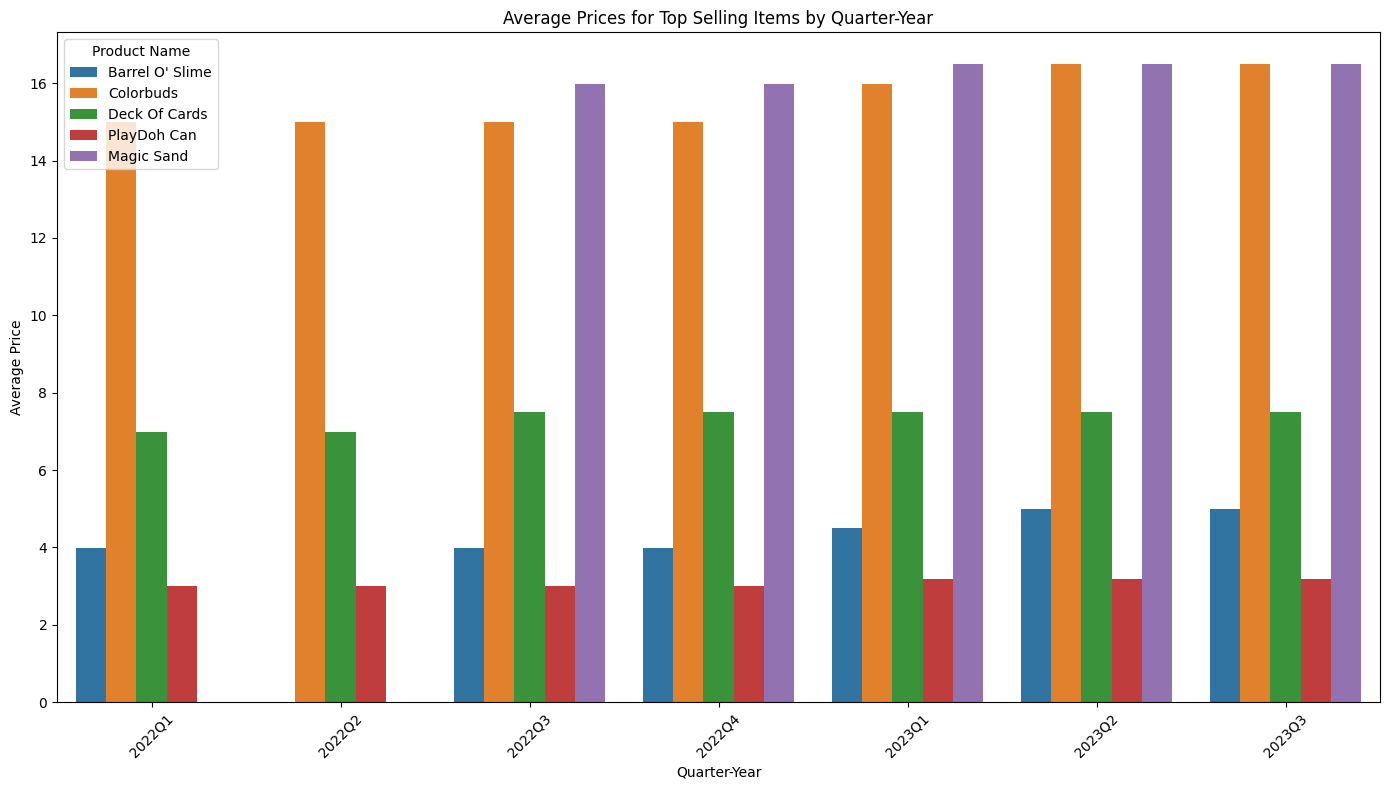

In [22]:
import pandas as pd

df['Date'] = pd.to_datetime(df['Date'])

# Create a Quarter-Year column
df['Quarter_Year'] = df['Date'].dt.to_period('Q')

# Identify top 5 selling items by total units sold
top_selling_items = df.groupby('Product_Name')['Units'].sum().nlargest(5).index.tolist()

# Filter the DataFrame for top selling items
filtered_df = df[df['Product_Name'].isin(top_selling_items)]

# Group by Quarter-Year and Product_Name, calculating the average price
average_prices = filtered_df.groupby(['Quarter_Year', 'Product_Name'])['Product_Price'].mean().reset_index()

# Plotting a bar graph showing Date vs Prices for the top selling items
plt.figure(figsize=(14, 8))
sns.barplot(data=average_prices, x='Quarter_Year', y='Product_Price', hue='Product_Name')
plt.title('Average Prices for Top Selling Items by Quarter-Year')
plt.xlabel('Quarter-Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Product Name')
plt.tight_layout()
plt.show()

### Date vs Revenue

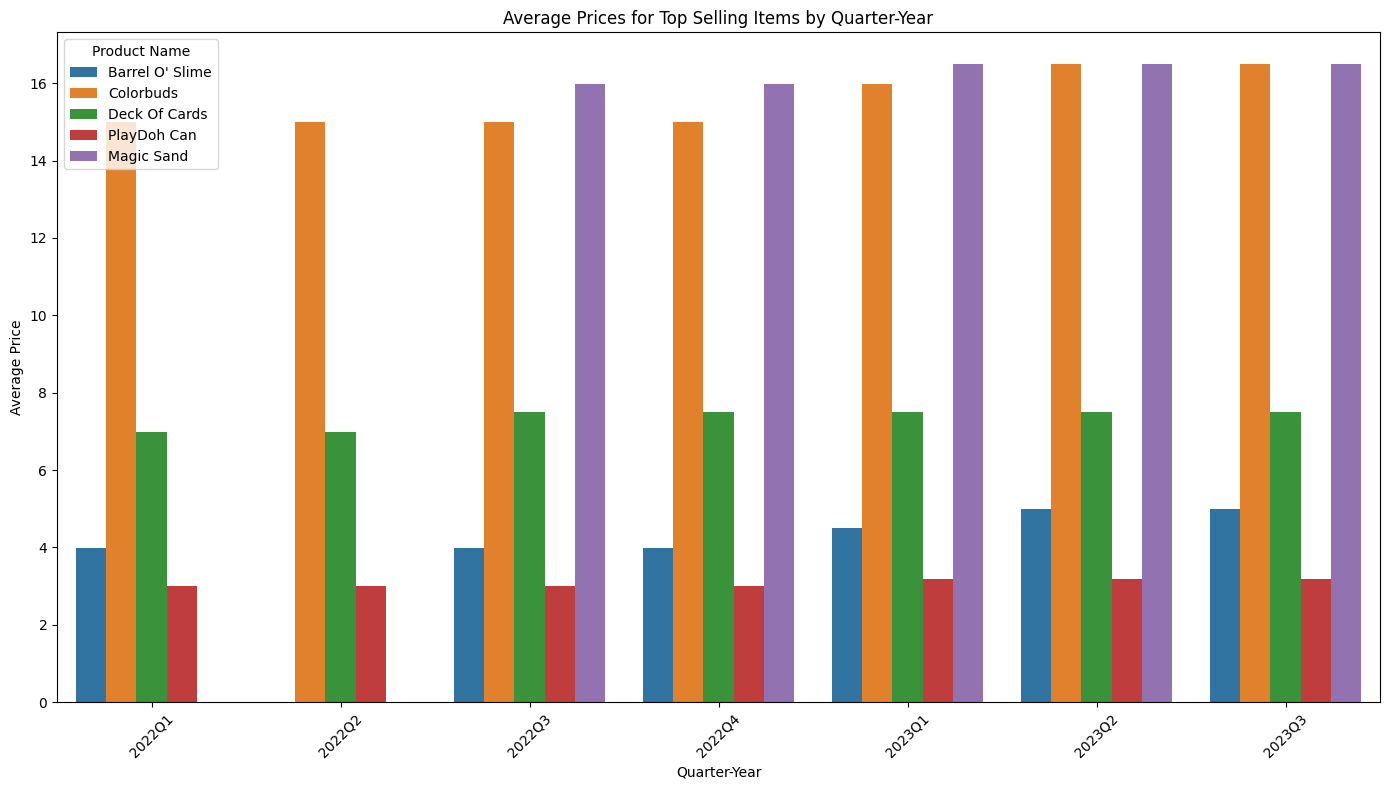

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a Quarter-Year column
df['Quarter_Year'] = df['Date'].dt.to_period('Q').astype(str)

# Identify top 5 selling items by total units sold
top_selling_items = df.groupby('Product_Name')['Units'].sum().nlargest(5).index.tolist()

# Filter the DataFrame for top selling items
filtered_df = df[df['Product_Name'].isin(top_selling_items)]

# Group by Quarter-Year and Product_Name, calculating the average price
average_prices = filtered_df.groupby(['Quarter_Year', 'Product_Name'])['Product_Price'].mean().reset_index()

# Plotting a bar graph showing Date vs Prices for the top selling items
plt.figure(figsize=(14, 8))
sns.barplot(data=average_prices, x='Quarter_Year', y='Product_Price', hue='Product_Name')
plt.title('Average Prices for Top Selling Items by Quarter-Year')
plt.xlabel('Quarter-Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Product Name')
plt.tight_layout()
plt.show()


### Date vs Profit

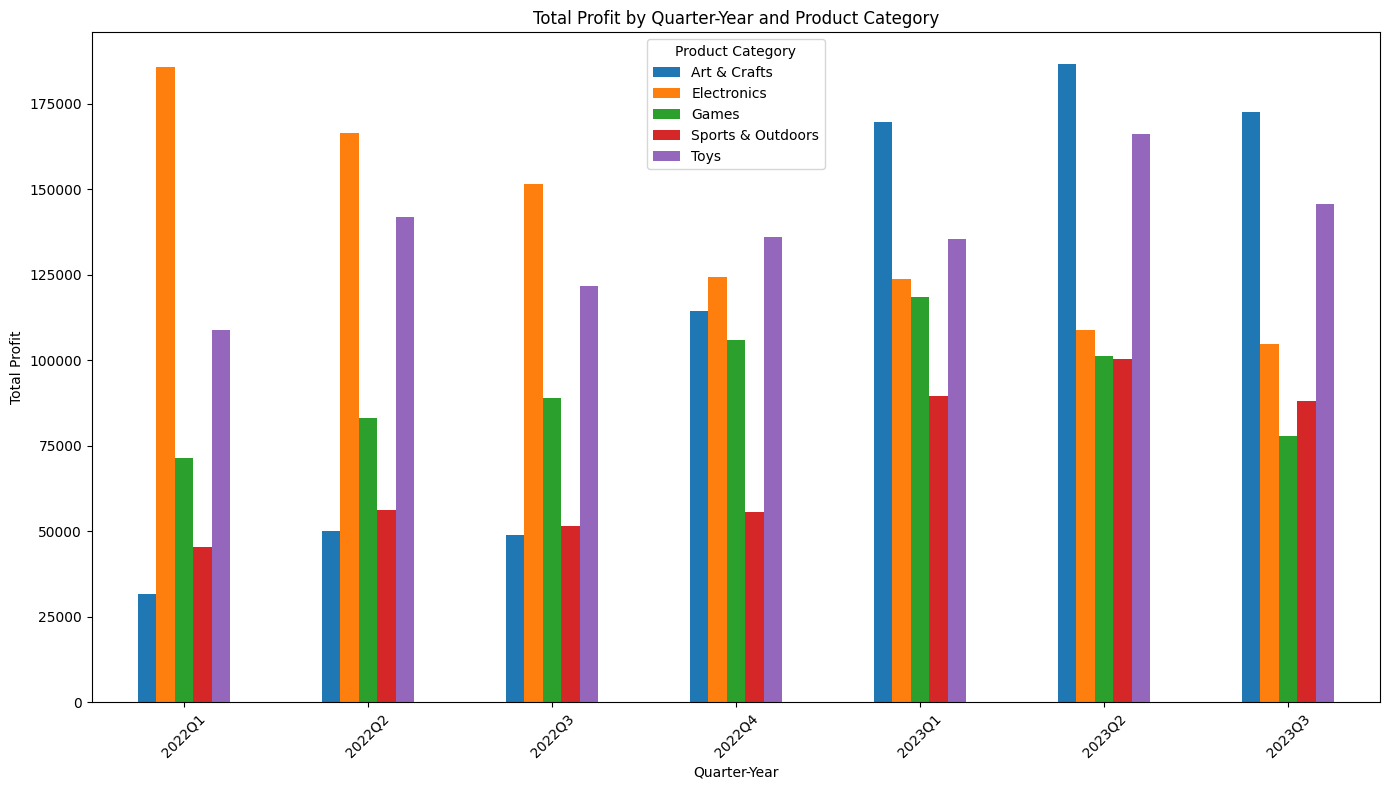

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert Date to datetime and extract Quarter-Year
df['Date'] = pd.to_datetime(df['Date'])
df['Quarter_Year'] = df['Date'].dt.to_period('Q').astype(str)

# Group by Quarter-Year and Product_Category, summing the profit
profit_data = df.groupby(['Quarter_Year', 'Product_Category'])['Profit'].sum().reset_index()

# Pivot the data for plotting
profit_pivot = profit_data.pivot(index='Quarter_Year', columns='Product_Category', values='Profit').fillna(0)

# Plotting the bar graph with separate bars for each category
profit_pivot.plot(kind='bar', figsize=(14, 8))
plt.title('Total Profit by Quarter-Year and Product Category')
plt.xlabel('Quarter-Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


### Top 5 selling items every month

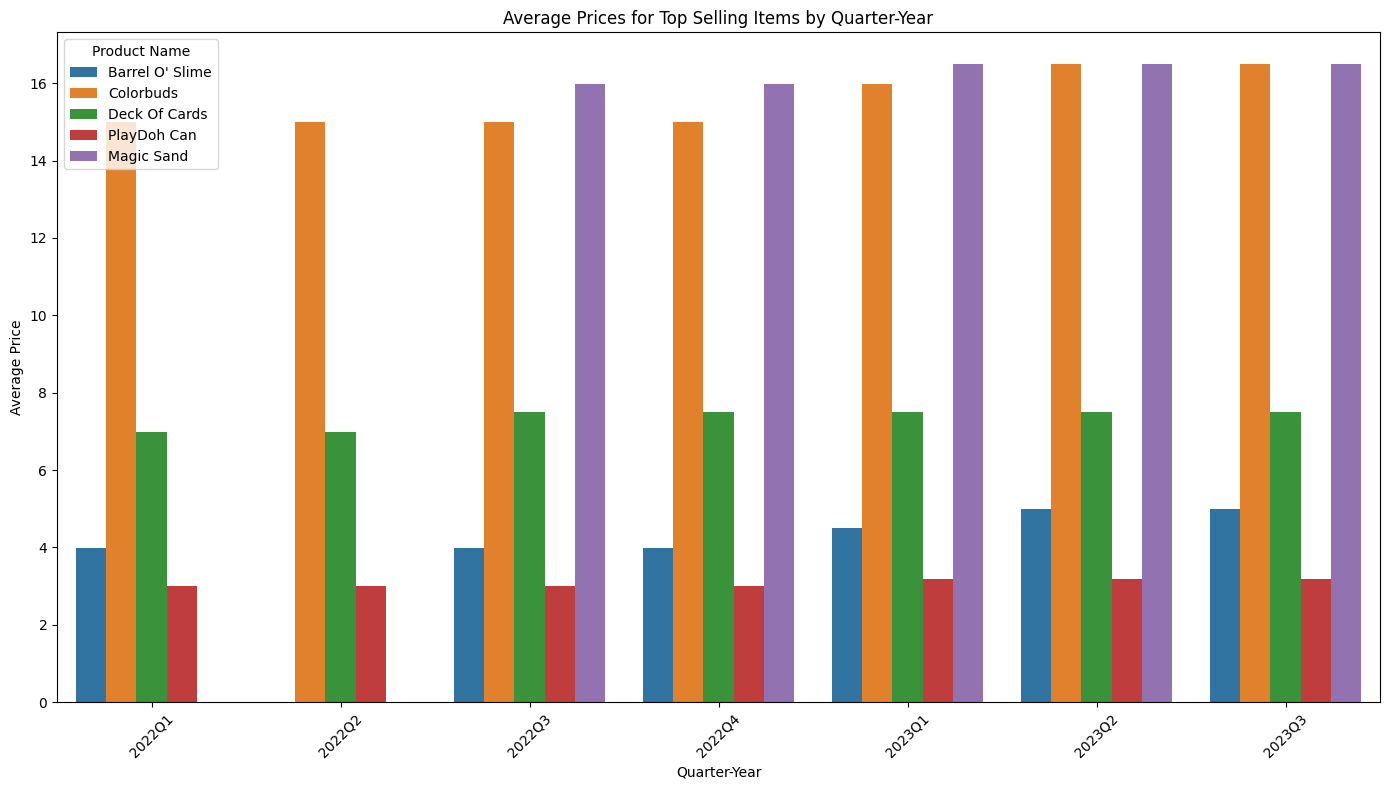

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a Quarter-Year column
df['Quarter_Year'] = df['Date'].dt.to_period('Q').astype(str)

# Identify top 5 selling items by total units sold
top_selling_items = df.groupby('Product_Name')['Units'].sum().nlargest(5).index.tolist()

# Filter the DataFrame for top selling items
filtered_df = df[df['Product_Name'].isin(top_selling_items)]

# Group by Quarter-Year and Product_Name, calculating the average price
average_prices = filtered_df.groupby(['Quarter_Year', 'Product_Name'])['Product_Price'].mean().reset_index()

# Plotting a bar graph showing Date vs Prices for the top selling items
plt.figure(figsize=(14, 8))
sns.barplot(data=average_prices, x='Quarter_Year', y='Product_Price', hue='Product_Name')
plt.title('Average Prices for Top Selling Items by Quarter-Year')
plt.xlabel('Quarter-Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.legend(title='Product Name')
plt.tight_layout()
plt.show()
